# Facial Expressions Recognition using PCA with ANN, SVM and Naive Bayes classifier

For Facial Expressions Recognition, Japanese Female Facial Expressions (JAFFE) dataset was used

For feature extraction, Principal Component Analysis (PCA) was applied

After feature extraction, Artificial Neural Network (ANN), Support Vector Machine (SVM) and Naive Bayes classifier were applied on extracted features for classification

#### Importing required libraries 

In [1]:
import cv2
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:469: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:470: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:471: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\tensorflow\python\framework\dtypes.py:4

#### Creating a function to read images in the folders and return preprocessed images with labels

Here preprocessing includes Face Detection and Resizing the dimension of detected face to 100*100

In [2]:
def load_images(Folders, faceCascade):
    images = []
    labels = []
    for folder in os.listdir(Folders):
        file = os.path.join(Folders, folder)
        for filename in os.listdir(file):
            img = cv2.imread(os.path.join(file, filename))
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            face = faceCascade.detectMultiScale(gray_img)
            for (x, y, w, h) in face:
                crop = gray_img[y:y+h, x:x+w]
                img = cv2.resize(crop, (100, 100))
            if img is not None:
                images.append(img)
                labels.append(folder)
    return images, labels

#### Reading images in the folder

In [3]:
Folders = 'Jaffe'
faceCascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')
Images, Labels = load_images(Folders, faceCascade)

#### Visualizing the first image of Jaffe dataset with its corresponding label after preprocessing

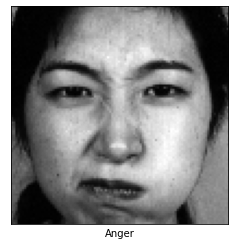

In [4]:
plt.imshow(Images[0], cmap = plt.cm.gray)
plt.xticks([])
plt.yticks([])
plt.xlabel(Labels[0])
plt.show()

#### Encoding the labels

In [5]:
targets = LabelEncoder().fit_transform(np.array(Labels).reshape(-1,1))

C:\Users\FIX\anaconda3\envs\AI\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


#### Normalizing the images

In [6]:
images = np.array(Images)/255.0

#### Flatten the images

In [7]:
images_pca = images.reshape(-1,10000)

#### Splitting the images as training and testing

In [8]:
train_x, test_x, train_y, test_y = train_test_split(images_pca, targets, test_size = 0.25)

### Applying PCA to images

#### Retaining 99% of the variance of the features

In [9]:
pca = PCA(0.99)

pca.fit(train_x)

train_x, test_x = pca.transform(train_x), pca.transform(test_x)

### Applying SVM to the features extracted from PCA 

In [10]:
svm = SVC()

svm.fit(train_x, train_y)

ysvm_pred = svm.predict(test_x)
ysvm_train = svm.predict(train_x)

ysvm_pred_acc = accuracy_score(ysvm_pred, test_y)
ysvm_train_acc = accuracy_score(ysvm_train, train_y) 

print('Training Accuracy of SVM : ', ysvm_train_acc)
print('Testing Accuracy of SVM : ', ysvm_pred_acc)

Training Accuracy of SVM :  0.9622641509433962
Testing Accuracy of SVM :  0.7592592592592593


### Applying ANN to the features extracted from PCA 

#### Finding the shape of images to determine the number of neurons in Input layer of ANN

In [11]:
train_x.shape

(159, 120)

#### Creating the ANN model

In [12]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(120, input_dim=120),
    tf.keras.layers.Dense(30, activation = 'sigmoid'),
    tf.keras.layers.Dense(7, activation = 'softmax')
])

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

#### Running the ANN model

In [13]:
results = model.fit(train_x, train_y, epochs = 15, batch_size = 20, validation_data = (test_x, test_y))

Train on 159 samples, validate on 54 samples
Epoch 1/15
159/159 [==============================] - 2s - loss: 2.1608 - acc: 0.1572 - val_loss: 2.0351 - val_acc: 0.1667
Epoch 2/15
159/159 [==============================] - 0s - loss: 1.9029 - acc: 0.2327 - val_loss: 1.8708 - val_acc: 0.2593
Epoch 3/15
159/159 [==============================] - 0s - loss: 1.7096 - acc: 0.4214 - val_loss: 1.7353 - val_acc: 0.3519
Epoch 4/15
159/159 [==============================] - 0s - loss: 1.5468 - acc: 0.5283 - val_loss: 1.6178 - val_acc: 0.5000
Epoch 5/15
159/159 [==============================] - 0s - loss: 1.4113 - acc: 0.6415 - val_loss: 1.5118 - val_acc: 0.5741
Epoch 6/15
159/159 [==============================] - 0s - loss: 1.2827 - acc: 0.7610 - val_loss: 1.4250 - val_acc: 0.6481
Epoch 7/15
159/159 [==============================] - 0s - loss: 1.1751 - acc: 0.7987 - val_loss: 1.3448 - val_acc: 0.6852
Epoch 8/15
159/159 [==============================] - 0s - loss: 1.0765 - acc: 0.8931 - val_lo

In [17]:
print('Training Accuracy of ANN : ', results.history['acc'][14])
print('Testing Accuracy of ANN : ', results.history['val_acc'][14])

Training Accuracy of ANN :  0.9874213847724147
Testing Accuracy of ANN :  0.83333334657881


### Applying Naive  Bayes classifier to the features extracted from PCA 

In [18]:
NB = GaussianNB()

NB.fit(train_x,train_y)

ynb_pred = NB.predict(test_x)
ynb_train = NB.predict(train_x)

ynb_pred_acc = accuracy_score(ynb_pred, test_y)
ynb_train_acc = accuracy_score(ynb_train, train_y)

print('Training Accuracy of Naive Bayes classifier : ', ynb_train_acc)
print('Testing Accuracy of Naive Bayes classifier : ', ynb_pred_acc)

Training Accuracy of Naive Bayes classifier :  0.9811320754716981
Testing Accuracy of Naive Bayes classifier :  0.7222222222222222


### Visualizing the results obtained from SVM, ANN and Naive Bayes classifier

<Figure size 360x360 with 0 Axes>

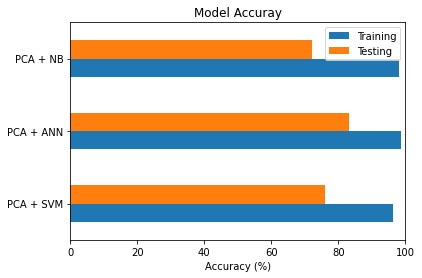

In [20]:
data = { 'Training' : [ysvm_train_acc*100, results.history['acc'][14]*100, ynb_train_acc*100], 'Testing' : [ysvm_pred_acc*100,  results.history['val_acc'][14]*100, ynb_pred_acc*100]}
df = pd.DataFrame(data, columns = ['Training', 'Testing'], index = ['PCA + SVM', 'PCA + ANN', 'PCA + NB'])

plt.figure(figsize = (5, 5))
df.plot.barh()
plt.title("Model Accuray")
plt.xlabel('Accuracy (%)')
plt.xlim([0, 100])
plt.show()